In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
def batch_gradient_descent(y, X, alpha, epsilon, 
                           plot_on=-1, plot_func=None):
    # Initialize our "guess" for each coefficient theta_j to 1
    # and store these in a single column
    theta = np.ones(shape=(X.shape[1], 1))
    
    m = X.shape[0] # number of data points
    
    # Calculate a column of predicted y values for each data point
    y_hat = X @ theta
    
    # calculate a 1 by 1 matrix that holds the sum of the squared
    # differences between each y_hat and y
    cost = np.transpose(y_hat - y) @ (y_hat - y)
    
    # initialize list of costs to contain the cost associated with
    # our initial coefficients (scaled by 1/2m in accordance with
    # the cost formula)
    costs = [cost[0][0] / (2 * m)]
    
    i = 0 # number of iterations
    delta = 1 # Change in cost
    
    while (delta > epsilon):
        if (plot_on > 0 and i % plot_on == 0 and plot_func is not None):
            plot_func(theta)
        
        # calculate a column that holds the difference between y_hat and
        # y for each data point
        differences = X @ theta - y
        
        # Update each theta_j by the partial derivative of the cost with
        # respect to theta_j, scaled by learning rate
        
        # Note: np.transpose(X) gives us the observed values (x_j) for
        # a parameter j in the j'th row of a matrix
        theta = theta - (alpha / m) * ((np.transpose(X)) @ differences)
        
        # Using the updated coefficient values, append the new cost value
        cost = np.transpose(X @ theta - y) @ (X @ theta - y)
        costs.append(cost[0][0] / (2 * m))
        delta = abs(costs[i + 1] - costs[i])
        
        if (costs[i + 1] > costs[i]):
            print('Cost is increasing. Try reducing alpha.')
            break
        i += 1
    
    if (plot_on > 0 and i % plot_on == 0 and plot_func is not None):
        plot_func(theta)
        
    print('Completed in', i, 'iterations.')
    return theta

Completed in 10 iterations.


array([[3.22594069]])

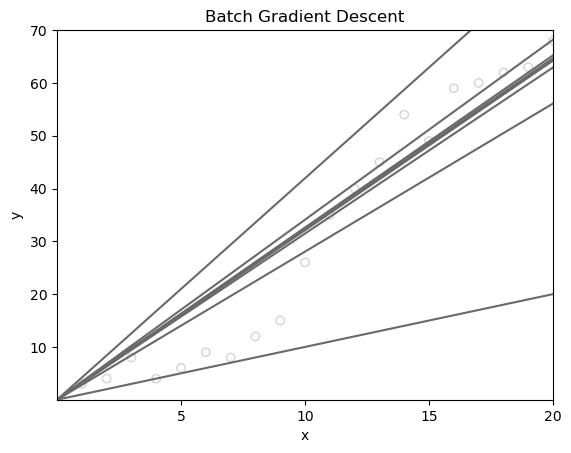

In [8]:
df = pd.read_csv('regression.csv')
X = df[['x']]
y = df[['y']]

plt.xlabel('x')
plt.ylabel('y')
plt.title('Batch Gradient Descent')

xt = np.arange(0, df.x.max() + 5, 5)
yt = np.arange(0, df.y.max() + 10, 10)

plt.axis([xt[0], xt[-1], yt[0], yt[-1]])
plt.xticks(xt[1:])
plt.yticks(yt[1:])

# originial data
plt.scatter(df.x, df.y, facecolors='none', edgecolors='lightgray')

x_prime = [xt[0], xt[-1]]

def plot_model(theta):
    y_hat = [xp * theta[0] for xp in x_prime]
    plt.plot(x_prime, y_hat, color='dimgrey')
    
X = X.to_numpy()
y = y.to_numpy()

batch_gradient_descent(y=y, X=X, alpha=0.01, epsilon=10**-4,
                       plot_on=1, plot_func=plot_model)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Perform batch gradient descent, as in the previous example,
# but plots the evolution of cost as opposed to the evolution of
# the regression line
def batch_gradient_descent(y, X, alpha, epsilon):
    theta = np.ones(shape=(X.shape[1], 1))
    m = X.shape[0]
    cost = np.transpose(X @ theta - y) @ (X @ theta - y)
    costs = [cost[0][0] / (2 * m)]
    
    i = 0
    delta = 1
    
    while (delta > epsilon):
        theta = theta - (alpha / m) * ((np.transpose(X)) @ (X @ theta - y))
                
        cost = np.transpose(X @ theta - y) @ (X @ theta - y)
        costs.append(cost[0][0] / (2 * m))
        delta = abs(costs[i + 1] - costs[i])
        
        if (costs[i + 1] > costs[i]):
            print('Cost is increasing. Try reducing alpha.')
            break
        i += 1
        
    print('Completed in', i, 'iterations.')
    # Plot the cost versus iteration
    plt.plot([i for i in range(len(costs))], costs)
    return theta

Completed in 10 iterations.


array([[3.22594069]])

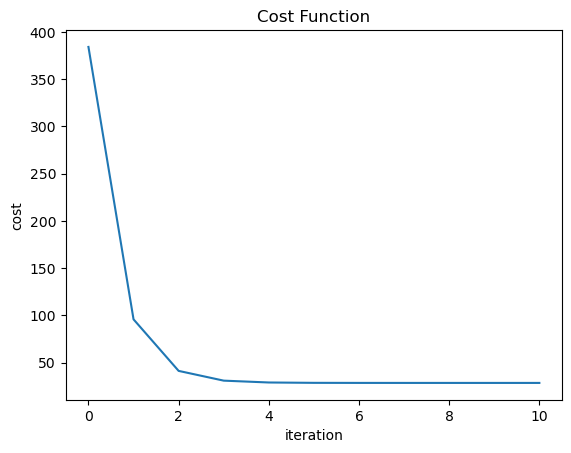

In [10]:
df = pd.read_csv('regression.csv')
X = df[['x']].to_numpy()
y = df[['y']].to_numpy()

# Set up our plotting environment
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('Cost Function')
batch_gradient_descent(y=y, X=X, alpha=0.01, epsilon=10**-4)

